In [ ]:
import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline

# New Section

In [ ]:
train_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Thesis/TON_IoT/Train_Test_Network.csv")

In [ ]:
train_df.head()

,ts,src_ip,src_port,dst_ip,dst_port,proto,service,duration,src_bytes,dst_bytes,conn_state,missed_bytes,src_pkts,src_ip_bytes,dst_pkts,dst_ip_bytes,dns_query,dns_qclass,dns_qtype,dns_rcode,dns_AA,dns_RD,dns_RA,dns_rejected,ssl_version,ssl_cipher,ssl_resumed,ssl_established,ssl_subject,ssl_issuer,http_trans_depth,http_method,http_uri,http_version,http_request_body_len,http_response_body_len,http_status_code,http_user_agent,http_orig_mime_types,http_resp_mime_types,weird_name,weird_addl,weird_notice,label,type
0,1554198358,3.122.49.24,1883,192.168.1.152,52976,tcp,-,80549.530260,1762852,41933215,OTH,0,252181,14911156,2,236,-,0,0,0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0,0,0,-,-,-,bad_TCP_checksum,-,F,0,normal
1,1554198358,192.168.1.79,47260,192.168.1.255,15600,udp,-,0.000000,0,0,S0,0,1,63,0,0,-,0,0,0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0,0,0,-,-,-,-,-,-,0,normal
2,1554198359,192.168.1.152,1880,192.168.1.152,51782,tcp,-,0.000000,0,0,OTH,0,0,0,0,0,-,0,0,0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0,0,0,-,-,-,bad_TCP_checksum,-,F,0,normal
3,1554198359,192.168.1.152,34296,192.168.1.152,10502,tcp,-,0.000000,0,0,OTH,0,0,0,0,0,-,0,0,0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0,0,0,-,-,-,-,-,-,0,normal
4,1554198362,192.168.1.152,46608,192.168.1.190,53,udp,dns,0.000549,0,298,SHR,0,0,0,2,354,-,0,0,0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0,0,0,-,-,-,bad_UDP_checksum,-,F,0,normal


In [ ]:
train_df.shape

(461043, 45)

**Removing the duplicates records**

In [ ]:
train_df = train_df.drop_duplicates() 

In [ ]:
train_df.reset_index(drop=True, inplace=True)

In [ ]:
train_df.shape

(449972, 45)

In [ ]:
train_df['type'].unique()

array(['normal', 'scanning', 'dos', 'injection', 'ddos', 'password',
       'xss', 'ransomware', 'backdoor', 'mitm'], dtype=object)

Class as pie chart:


Text(0.5, 0, '')

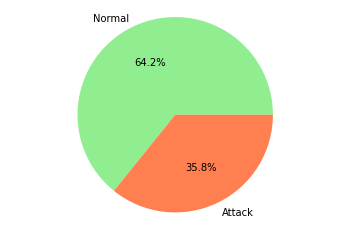

In [ ]:
print("Class as pie chart:")
fig, ax = plt.subplots(1, 1)
ax.pie(train_df.label.value_counts(),autopct='%1.1f%%', labels=['Normal','Attack'], colors=['lightgreen','coral'])
plt.axis('equal')
plt.xlabel('')

In [ ]:
attack_class_train = train_df[['type']].apply(lambda x:x.value_counts())
attack_class_train['attack_freq_train'] = round((100 * attack_class_train/attack_class_train.sum()),2)

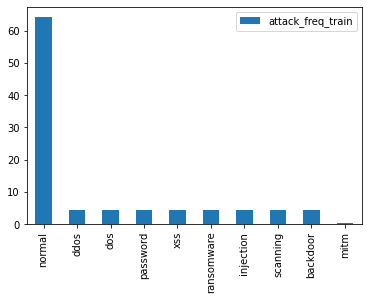

In [ ]:
plot = attack_class_train[['attack_freq_train']].plot(kind="bar")

In [ ]:
colors = ['mistyrose', 'red','yellowgreen', 'lightcoral', 'gold','indigo','orange','grey','cyan','purple']

In [ ]:
labels=['normal','xss','scanning','ransomware','ddos','password','dos','backdoor','injection','mitm']

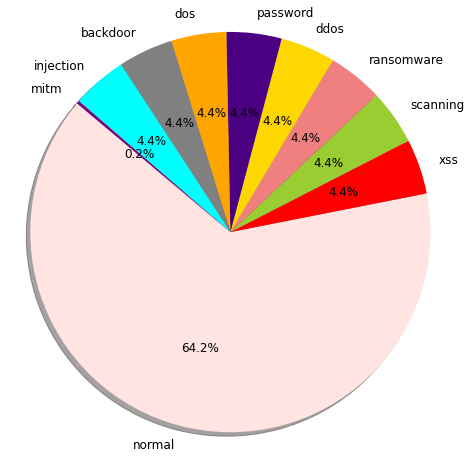

In [ ]:
# Plot the different attack class types
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(8,8))
plt.pie(train_df.type.value_counts(), labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

**Dropping Src and destination IP**

In [ ]:
train_df = train_df.drop(['src_ip'], axis = 1)

In [ ]:
train_df = train_df.drop(['dst_ip'], axis = 1)

Dropping TimeStamp and dns query (Domain name subject of the query)

In [ ]:
train_df = train_df.drop(['ts','dns_query'], axis = 1)

In [ ]:
cols_category = train_df.select_dtypes('object').columns 
cols_numeric = train_df._get_numeric_data().columns
print(cols_category)
print(cols_numeric)

Index(['proto', 'service', 'conn_state', 'dns_AA', 'dns_RD', 'dns_RA',
       'dns_rejected', 'ssl_version', 'ssl_cipher', 'ssl_resumed',
       'ssl_established', 'ssl_subject', 'ssl_issuer', 'http_trans_depth',
       'http_method', 'http_uri', 'http_version', 'http_user_agent',
       'http_orig_mime_types', 'http_resp_mime_types', 'weird_name',
       'weird_addl', 'weird_notice', 'type'],
      dtype='object')
Index(['src_port', 'dst_port', 'duration', 'src_bytes', 'dst_bytes',
       'missed_bytes', 'src_pkts', 'src_ip_bytes', 'dst_pkts', 'dst_ip_bytes',
       'dns_qclass', 'dns_qtype', 'dns_rcode', 'http_request_body_len',
       'http_response_body_len', 'http_status_code', 'label'],
      dtype='object')


In [ ]:
from keras.utils.np_utils import to_categorical

In [ ]:
train_df.ssl_cipher.unique()

array(['-', 'TLS_ECDHE_RSA_WITH_AES_128_GCM_SHA256',
       'TLS_AES_128_GCM_SHA256',
       'TLS_ECDHE_ECDSA_WITH_AES_128_GCM_SHA256',
       'TLS_ECDHE_RSA_WITH_AES_256_GCM_SHA384',
       'TLS_ECDHE_RSA_WITH_AES_256_CBC_SHA'], dtype=object)

In [ ]:
train_df.ssl_cipher.value_counts()

-                                          449666
TLS_ECDHE_RSA_WITH_AES_128_GCM_SHA256         176
TLS_AES_128_GCM_SHA256                        116
TLS_ECDHE_RSA_WITH_AES_256_GCM_SHA384          11
TLS_ECDHE_RSA_WITH_AES_256_CBC_SHA              2
TLS_ECDHE_ECDSA_WITH_AES_128_GCM_SHA256         1
Name: ssl_cipher, dtype: int64

In [ ]:
train_df= train_df.replace({'http_trans_depth':'-'}, 0)

In [ ]:
train_df= train_df.replace({'weird_addl':'-'}, 0)

In [ ]:
train_df['weird_addl'] = train_df['weird_addl'].astype('int64')

In [ ]:
 train_df['http_trans_depth'] = train_df['http_trans_depth'].astype('int64')

 Getting the list of non num features 

In [ ]:
ls_strings =[]
for column in list(train_df.columns):
     if train_df[column].dtypes == 'O':
            ls_strings.append(column)

In [ ]:
i=0
while i<len(ls_strings):
      j=0
      uniq = train_df[ls_strings[i]].unique()
      while j<len(uniq):
                train_df = train_df.replace({ls_strings[i] : uniq[j]}, j)
                j+=1
      i+=1
    

In [ ]:
for i in list(train_df):
        train_df[i] = train_df[i].astype(float)

In [ ]:
y_cat = np.array(train_df['type'])
y_lbl = np.array(train_df['label'])
train_df = train_df.drop(columns = ['type','label'])

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
list_features = list(train_df.columns)
print(list_features)

['src_port', 'dst_port', 'proto', 'service', 'duration', 'src_bytes', 'dst_bytes', 'conn_state', 'missed_bytes', 'src_pkts', 'src_ip_bytes', 'dst_pkts', 'dst_ip_bytes', 'dns_qclass', 'dns_qtype', 'dns_rcode', 'dns_AA', 'dns_RD', 'dns_RA', 'dns_rejected', 'ssl_version', 'ssl_cipher', 'ssl_resumed', 'ssl_established', 'ssl_subject', 'ssl_issuer', 'http_trans_depth', 'http_method', 'http_uri', 'http_version', 'http_request_body_len', 'http_response_body_len', 'http_status_code', 'http_user_agent', 'http_orig_mime_types', 'http_resp_mime_types', 'weird_name', 'weird_addl', 'weird_notice']


In [ ]:
train_df[list_features] = scaler.fit_transform(train_df[list_features])                    
train_df.head()

,src_port,dst_port,proto,service,duration,src_bytes,dst_bytes,conn_state,missed_bytes,src_pkts,src_ip_bytes,dst_pkts,dst_ip_bytes,dns_qclass,dns_qtype,dns_rcode,dns_AA,dns_RD,dns_RA,dns_rejected,ssl_version,ssl_cipher,ssl_resumed,ssl_established,ssl_subject,ssl_issuer,http_trans_depth,http_method,http_uri,http_version,http_request_body_len,http_response_body_len,http_status_code,http_user_agent,http_orig_mime_types,http_resp_mime_types,weird_name,weird_addl,weird_notice
0,0.028718,0.808424,0.0,0.000000,8.613363e-01,0.000453,1.071405e-02,0.000000,0.0,1.000000,0.314799,0.000006,0.000003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.721148,0.238059,0.5,0.000000,0.000000e+00,0.000000,0.000000e+00,0.083333,0.0,0.000004,0.000001,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.090909,0.0,1.0
2,0.028673,0.790203,0.0,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.523324,0.160262,0.0,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.090909,0.0,1.0
4,0.711199,0.000809,0.5,0.111111,5.870595e-09,0.000000,7.613979e-08,0.166667,0.0,0.000000,0.000000,0.000006,0.000004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.181818,0.0,0.0


In [ ]:
X = train_df.to_numpy()

In [ ]:

Y=y_cat

In [ ]:
test_percentage =10
vald_percentage =10
from sklearn.model_selection import train_test_split
X,Xtest,Y,Ytest = train_test_split(X,Y, stratify=Y,test_size=(test_percentage/100))
Xtrain,Xvalid,Ytrain,Yvalid = train_test_split(X,Y, stratify=Y,test_size=(vald_percentage/100))

In [ ]:
print(X.shape)
print(Y.shape)
print(Xtest.shape)
print(Ytest.shape)
print(Xtrain.shape)
print(Ytrain.shape)
print(Xvalid.shape)
print(Yvalid.shape)

(404974, 39)
(404974,)
(44998, 39)
(44998,)
(364476, 39)
(364476,)
(40498, 39)
(40498,)


# Definin appropriate array shapes for Keras Neural Nets

In [ ]:
Xtrain = Xtrain.reshape((len(Xtrain),1,Xtrain.shape[1]))
Xtrain_orig = np.copy(Xtrain)

In [ ]:
print("Xtrain.shape ",Xtrain.shape)
print("Xtrain_orig ",Xtrain_orig.shape)

Xtrain.shape  (364476, 1, 39)
Xtrain_orig  (364476, 1, 39)


In [ ]:
Xvalid = Xvalid.reshape((len(Xvalid),1,Xvalid.shape[1]))
Xvalid_orig = np.copy(Xvalid)

Xtest  = Xtest.reshape((len(Xtest),1,Xtest.shape[1]))
Xtest_orig = np.copy(Xtest)

In [ ]:
print(Xvalid.shape , Xvalid_orig.shape)

(40498, 1, 39) (40498, 1, 39)


In [ ]:
print(Xtest.shape, Xtest_orig.shape)

(44998, 1, 39) (44998, 1, 39)


In [ ]:
Xtrain = Xtrain_orig
Xvalid = Xvalid_orig
Xtest = Xtest_orig
num_classes = 1

CONV Implementation

In [ ]:
nn_type = '1D Convulotional'
every_item_repeat = 1
num_filters = np.array ([64])
num_filters = np.tile(num_filters,every_item_repeat)
repeat_no = len(num_filters)
print(repeat_no)

1


In [ ]:
kern_size = 3
step_size = 1
dilation_size = 1


In [ ]:
padd = 'same'
data_form = 'channels_last' # (batch, steps, channels)
act_funct = 'relu'#keras.layers.LeakyReLU(alpha=0.3)#'relu'
auxi_act_funct = 'relu' #keras.layers.LeakyReLU(alpha=0.3)  #for other dense layers
output_act = 'softmax' #keras.layers.LeakyReLU(alpha=0.3)#'softmax'

loss_funct = 'categorical_crossentropy'#'mse'#
batch = 20240
num_epochs = 1000
cls_weights = None

In [ ]:
opt_type = 'Adam'
learning_rate = 0.002
decay_rate = learning_rate/num_epochs
moment = 0.8

In [ ]:
from tensorflow.keras import losses , optimizers, regularizers

In [ ]:
sgd = optimizers.SGD(lr=learning_rate,\
                     decay = decay_rate, \
                     momentum = moment, \
                     nesterov=True)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
rms = optimizers.RMSprop(lr = learning_rate, \
                         rho= 0.9, \
                         epsilon = None,\
                         decay = decay_rate)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
adagrad = optimizers.Adagrad (lr = learning_rate , \
                              epsilon = None , \
                              decay = decay_rate)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
adadelta = optimizers.Adadelta(lr = learning_rate, \
                         rho=0.95 , \
                         epsilon = None,\
                         decay = decay_rate)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
adam = optimizers.Adam(lr = learning_rate, \
                         beta_1 = 0.9 , \
                         beta_2 = 0.999 , \
                         epsilon = None,\
                         decay = decay_rate,\
                         amsgrad = True )

nadam = optimizers.Nadam(lr = learning_rate, \
                         beta_1 = 0.9, \
                         beta_2 = 0.999, \
                         epsilon = None, \
                         schedule_decay = 0.004)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
t_start_c = np.zeros(repeat_no)
t_end_c = np.zeros(repeat_no)

ac_train_c  = np.zeros(repeat_no)
ac_train_c_mean_intime = np.zeros(repeat_no+1)

ac_valid_c = np.zeros(repeat_no)
ac_valid_c_mean_intime = np.zeros(repeat_no+1)

ac_test_c = np.zeros(repeat_no)
ac_test_c_mean_intime = np.zeros(repeat_no+1)

ac_test_21_c = np.zeros(repeat_no)
ac_test_21_c_mean_intime = np.zeros(repeat_no+1)

In [ ]:
import time
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, LSTM ,GRU, Bidirectional
from tensorflow.keras.layers import Conv1D, MaxPooling1D,  AveragePooling1D, Flatten
from tensorflow.keras.layers import Embedding
from tensorflow.keras.activations import sigmoid, elu
from keras.layers.advanced_activations import PReLU,LeakyReLU,ELU, ThresholdedReLU, ReLU
from tensorflow.keras import losses , optimizers, regularizers
from keras.utils.np_utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow import keras
from tensorflow.keras import backend as k
import tensorflow as tf

In [ ]:
Ytrain_1hot = np.zeros([len(Ytrain),num_classes])
Yvalid_1hot = np.zeros([len(Yvalid),num_classes])
Ytest_1hot = np.zeros([len(Ytest),num_classes])

if num_classes != 1:
    for i in range(len(Ytrain)):
            Ytrain_1hot[i,Ytrain[i]] = 1
    
    for i in range(len(Yvalid)):
            Yvalid_1hot[i,Yvalid[i]] = 1
        
    for i in range(len(Ytest)):
            Ytest_1hot[i,Ytest[i]] = 1  
    
 
else:
      Ytrain_1hot = Ytrain
      Yvalid_1hot = Yvalid
      Ytest_1hot = Ytest

In [ ]:
i=0 
repeat_no = 1
while (i < repeat_no):
     t_start_c[i] = time.time()
     model_c = Sequential()
     model_c.add(Dense(64,activation = auxi_act_funct,input_shape = (Xtrain.shape[1],
                                   Xtrain.shape[2])))
     model_c.add(Dense(80,activation = auxi_act_funct))
     model_c.add(Conv1D(filters = num_filters[i], 
                        kernel_size = kern_size,
                        strides = step_size,
                        padding = padd,
                        data_format = data_form,
                        dilation_rate = 1,
                        activation = act_funct,
                        use_bias = True,
                        kernel_regularizer = keras.regularizers.l2(0.),
                        bias_regularizer = None,
                        activity_regularizer = None,
                        input_shape = (Xtrain_orig.shape[1],
                                          Xtrain_orig.shape[2])
                        ))
     model_c.add (MaxPooling1D(pool_size = 3, 
                                strides=None, 
                                padding='same', 
                                data_format=data_form,
                                 ))
     model_c.add (MaxPooling1D(pool_size = 3 , 
                                strides=None, 
                                padding='same', 
                                data_format = data_form,
                                  ))
     model_c.add(Dense(80,activation = auxi_act_funct))
     model_c.add(Dense(64,activation = auxi_act_funct))
     model_c.add(Conv1D(filters = num_filters[i], \
                           kernel_size = kern_size,\
                           strides = step_size,\
                           padding = padd,\
                           data_format = data_form,\
                           dilation_rate = 1,\
                           activation = act_funct,\
                           use_bias = True,\
#                           kernel_initializer = 'glorot_uniform',\
                           # bias_initializer = 'ones',\
                           # kernel_regularizer = keras.regularizers.l2(0.),\
                           bias_regularizer = None,\
                           activity_regularizer = None,\
                           kernel_constraint = None,\
                           bias_constraint = None,\
                                                      ))
     model_c.add (MaxPooling1D(pool_size = 3 , \
                                  strides=None, \
                                  padding='same', \
                                  data_format = data_form,\
                                 ))
     
     model_c.add(Conv1D(filters = num_filters[i], \
                           kernel_size = kern_size,\
                           strides = step_size,\
                           padding = padd,\
                           data_format = data_form,\
                           dilation_rate = 1,\
                           activation = act_funct,\
                           use_bias = True,\
#                           kernel_initializer = 'glorot_uniform',\
                           # bias_initializer = 'ones',\
                           # kernel_regularizer = keras.regularizers.l2(0.),\
                           bias_regularizer = None,\
                           activity_regularizer = None,\
                           kernel_constraint = None,\
                           bias_constraint = None,\
                                                      ))
     model_c.add (MaxPooling1D(pool_size = 3 , \
                                  strides=None, \
                                  padding='same', \
                                  data_format = data_form,\
                                 ))
        
     model_c.add(Dense(num_classes, activation = output_act))

        
        
        
     model_c.compile (loss=loss_funct , optimizer = sgd , metrics=['mae', 'acc'])
        
     callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                        min_delta = 0 ,
                                                        patience = 3,
                                                        mode  = 'min')
     history_c = model_c.fit (Xtrain_orig,Ytrain_1hot, 
                     epochs = num_epochs, 
                     batch_size = batch, 
                     class_weight = cls_weights,
                     validation_split = 0.0,
                     validation_data = (Xvalid_orig,Yvalid_1hot) ,
                     verbose = 1, 
                     shuffle = True
#                     callbacks=[#globals()['csv_logger_U'+str(num_filters[0])],\
#                             callback]
                    )
     t_end_c[i] = time.time()
     i = i+1

Epoch 1/1000
19/19 [==============================] - 7s 145ms/step - loss: 1.9323e-07 - mae: 1.9052 - acc: 0.0444 - val_loss: 1.9323e-07 - val_mae: 1.9052 - val_acc: 0.0444
Epoch 2/1000
19/19 [==============================] - 2s 127ms/step - loss: 1.9323e-07 - mae: 1.9052 - acc: 0.0444 - val_loss: 1.9323e-07 - val_mae: 1.9052 - val_acc: 0.0444
Epoch 3/1000
19/19 [==============================] - 2s 127ms/step - loss: 1.9323e-07 - mae: 1.9052 - acc: 0.0444 - val_loss: 1.9323e-07 - val_mae: 1.9052 - val_acc: 0.0444
Epoch 4/1000
19/19 [==============================] - 2s 127ms/step - loss: 1.9323e-07 - mae: 1.9052 - acc: 0.0444 - val_loss: 1.9323e-07 - val_mae: 1.9052 - val_acc: 0.0444
Epoch 5/1000
19/19 [==============================] - 2s 128ms/step - loss: 1.9323e-07 - mae: 1.9052 - acc: 0.0444 - val_loss: 1.9323e-07 - val_mae: 1.9052 - val_acc: 0.0444
Epoch 6/1000
19/19 [==============================] - 2s 128ms/step - loss: 1.9323e-07 - mae: 1.9052 - acc: 0.0444 - val_loss: 1.9